<center><font size=4 color=red> Info what use this notebook
https://www.kaggle.com/code/aliazimieco/forex-price-prediction-binary-classification-mode
https://medium.com/@dbhatt245/mastering-lstm-networks-for-text-classification-from-simple-sentiment-models-to-cnn-lstm-hybrids-00d93a131c28
https://medium.com/@jain.sm/hybrid-lstm-snn-model-for-stock-price-prediction-a-deep-dive-into-neural-network-fusion-012bd5fba7fc
https://medium.com/@moneytent/this-ai-forex-trading-strategy-will-make-you-rich-with-chat-gpt-4843132570d1
https://www.kaggle.com/code/hansmens/price-direction-prediction-eurusd-forex-pair
https://www.kaggle.com/code/muhammadqasimshabbir/lb0-9727-lgb-binaryclassificationwithbankdataset
https://capital.com/ru-int/learn/technical-analysis/fibonacci-retracement-strategy



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf
import ta

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            ConfusionMatrixDisplay, roc_auc_score,
                            mean_absolute_error, mean_squared_error, r2_score, 
                            mean_absolute_percentage_error)

from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor


import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 12

2025-12-31 06:45:30.897241: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-31 06:45:30.926068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-31 06:45:30.947605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-31 06:45:30.954911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-31 06:45:30.974394: I tensorflow/core/platform/cpu_feature_guar

In [2]:

ticker = 'EURUSD=X'
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365) 


df = yf.download(ticker, start=start_date, end=end_date, interval='1d', progress=False)

print(f"Download data: {df.shape[0]}\n\n")
print(len(df.shape))
print("periods:", df.index.min() - df.index.max()) 

Download data: 1299


2
periods: -1824 days +00:00:00


<center><font centor size = 8 color='green'>EDA

In [3]:
df.head(5)

Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2021-01-01  1.218027  1.221699  1.213499  1.217285        0
2021-01-04  1.225070  1.230999  1.217137  1.224905        0
2021-01-05  1.225160  1.229483  1.224995  1.225295        0
2021-01-06  1.230027  1.235025  1.226693  1.229861        0
2021-01-07  1.234111  1.234568  1.224665  1.233776        0

In [4]:
df.tail(5)

Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2025-12-23  1.176595  1.180359  1.176429  1.176443        0
2025-12-24  1.179551  1.180916  1.177426  1.179565        0
2025-12-26  1.178536  1.179941  1.176304  1.178384        0
2025-12-29  1.177274  1.178856  1.175406  1.177496        0
2025-12-30  1.175088  1.178273  1.174674  1.177579        0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1299 entries, 2021-01-01 to 2025-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, EURUSD=X)   1299 non-null   float64
 1   (High, EURUSD=X)    1299 non-null   float64
 2   (Low, EURUSD=X)     1299 non-null   float64
 3   (Open, EURUSD=X)    1299 non-null   float64
 4   (Volume, EURUSD=X)  1299 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 60.9 KB


In [6]:
df.describe()

Price         Close         High          Low         Open   Volume
Ticker     EURUSD=X     EURUSD=X     EURUSD=X     EURUSD=X EURUSD=X
count   1299.000000  1299.000000  1299.000000  1299.000000   1299.0
mean       1.106130     1.109493     1.102668     1.106124      0.0
std        0.057857     0.057318     0.058230     0.057846      0.0
min        0.959619     0.967006     0.954016     0.959619      0.0
25%        1.069393     1.072748     1.065678     1.069393      0.0
50%        1.092622     1.095422     1.089704     1.092622      0.0
75%        1.159152     1.161036     1.155235     1.159037      0.0
max        1.234111     1.235025     1.226693     1.233776      0.0

Text(0, 0.5, 'Close')

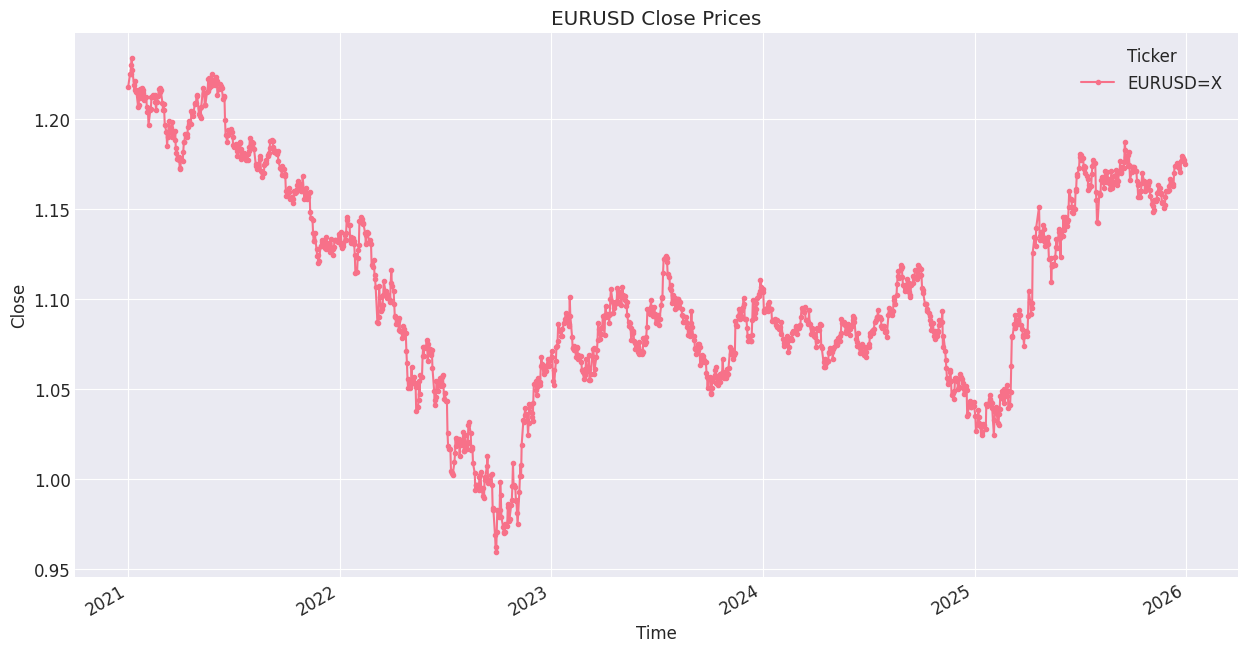

In [7]:
ax = df['Close'].plot(marker = '.', figsize= [15, 8])
ax.set_title('EURUSD Close Prices')
ax.set_xlabel("Time")
ax.set_ylabel('Close')

### Classical decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [9]:
df_trend = df['Close'].copy()
res = seasonal_decompose(x = df_trend['EURUSD=X'], model = 'additive', period=12)
res.trend.head(10)

Date
2021-01-01         NaN
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
2021-01-11    1.220680
2021-01-12    1.219785
2021-01-13    1.218752
2021-01-14    1.217627
Name: trend, dtype: float64

In [10]:
res.seasonal.head(10)

Date
2021-01-01    0.000448
2021-01-04    0.000221
2021-01-05    0.000625
2021-01-06    0.000608
2021-01-07    0.000187
2021-01-08    0.000372
2021-01-11   -0.000342
2021-01-12   -0.000128
2021-01-13   -0.000396
2021-01-14   -0.000848
Name: seasonal, dtype: float64

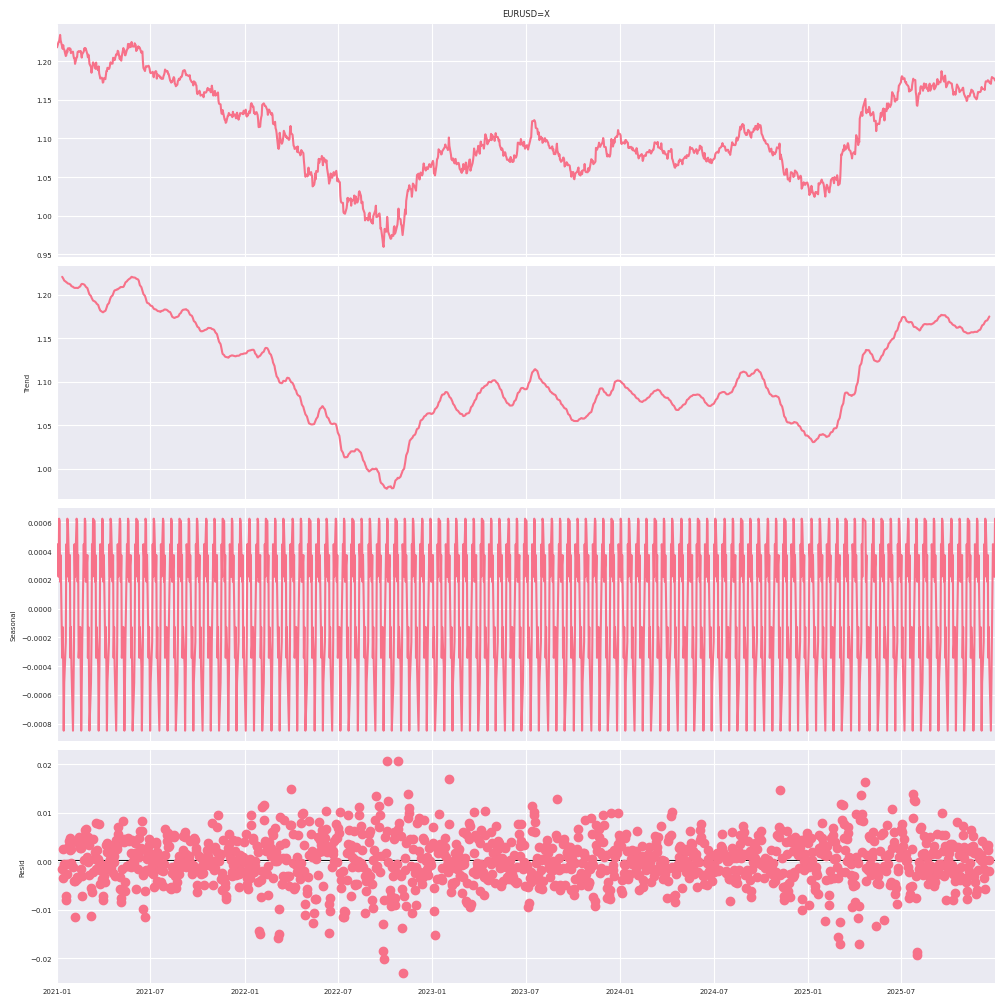

In [11]:
plt.rc("figure", figsize = (10, 10))
plt.rc("font", size = 5)
res.plot();

<font centor size = 5 color='red'>Indicators Append

In [12]:
df_end = df.copy()
df = df.copy()

if isinstance(df['Close'], pd.DataFrame): 
    close_series = df['Close'].squeeze()
else: 
    close_series = df['Close']

ema_periods = [8, 13, 21, 34, 55, 100]
for period in ema_periods: 
    df[f'EMA_{period}'] = close_series.ewm(span=period).mean()

print(f'Append:{len(ema_periods)} Ema indicators')


Append:6 Ema indicators


In [13]:
#fibonachi
df['High_20'] = df['High'].rolling(window=20).max()
df['Low_20'] = df['Low'].rolling(window=20).min()

fib_levels = [0.236, 0.382, 0.5, 0.628, 0.786]
for level in fib_levels:
    df[f'Fib_{level}'] = df['Low_20'] + (df['High_20'] - df['Low_20']) * level

print(f"Append {len(fib_levels)} fibonachi levels")

Append 5 fibonachi levels


In [14]:
delta = close_series.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

exp1 = close_series.ewm(span=12).mean()
exp2 = close_series.ewm(span=26).mean()
df['MACD'] = exp1 - exp2
df['MACD_signal'] = df['MACD'].ewm(span=9).mean()
df['MACD_diff'] = df['MACD'] - df['MACD_signal']

print("Append RSI and MACD")

Append RSI and MACD


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

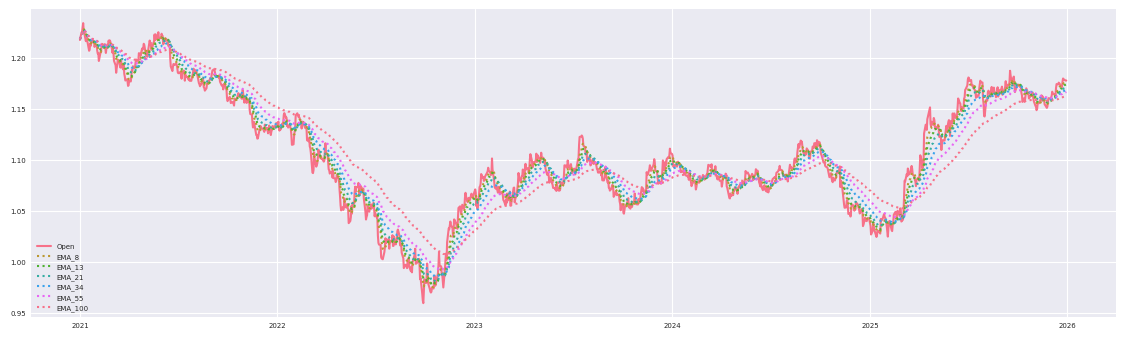

In [15]:
# Plot open price and moving averages
plt.figure(figsize=(14, 4))
plt.plot(df.index, df.Open)
plt.plot(df.index, df.EMA_8, ls=':')
plt.plot(df.index, df.EMA_13, ls=':')
plt.plot(df.index, df.EMA_21, ls=':')
plt.plot(df.index, df.EMA_34, ls=':')
plt.plot(df.index, df.EMA_55, ls=':')
plt.plot(df.index, df.EMA_100, ls=':')
plt.legend(['Open', 'EMA_8', 'EMA_13', 'EMA_21', 'EMA_34', 'EMA_55', 'EMA_100'])
plt.title

In [16]:
# 1. Calculate daily returns
df['Returns'] = close_series.pct_change()

# 2. Add time features
df['DayOfWeek'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['week'] = df.index.isocalendar().week

# 3. Create target variables for 7 days ahead
df['Future_Price_7d'] = close_series.shift(-7) # Price in 7 days
df['Future_Return_7d'] = (df['Future_Price_7d'] - close_series) / close_series # Return in 7 days

# 4. Classification: split into 3 classes (BUY/SELL/HOLD)
# Take 33rd and 66th percentiles of returns
percentiles = df['Future_Return_7d'].quantile([0.33, 0.66]).values

df['Target_Class'] = 0  # # HOLD (neutral class) - middle 34% returns
df.loc[df['Future_Return_7d'] < percentiles[0], 'Target_Class'] = -1  # SELL - bottom 33%
df.loc[df['Future_Return_7d'] > percentiles[1], 'Target_Class'] = 1   # BUY - top 66%


# 5. Regression: target price for prediction
df['Target_Reg'] = df['Future_Price_7d'] # Target price in 7 days

df = df.dropna()
print(f'Create: {len(df.columns)} features')


Create: 31 features


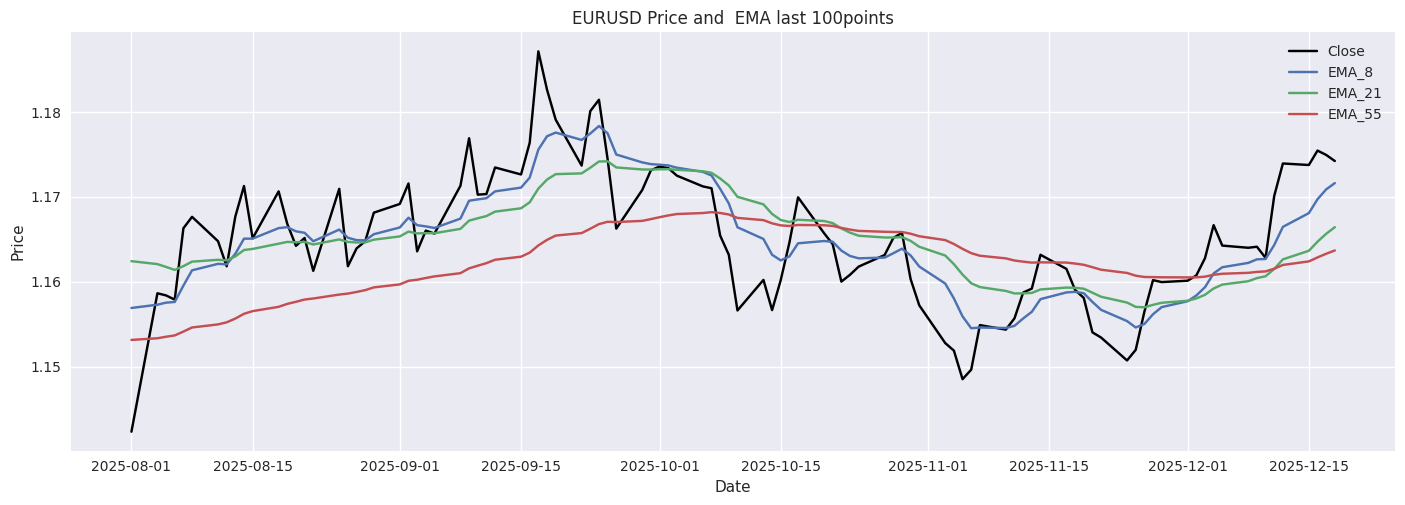

In [17]:
plt.style.use('seaborn-v0_8')

# 1) Price + several EMAs
fig, ax = plt.subplots(figsize=[14, 5])
df_plot = df.tail(100) # last 100 points to avoid clutter

ax.plot(df_plot.index, df_plot['Close'], label='Close', color='black')

for ema in ['EMA_8', 'EMA_21', 'EMA_55']: 
    if ema in df_plot.columns: 
        ax.plot(df_plot.index, df_plot[ema], label=ema)

ax.set_title('EURUSD Price and  EMA last 100points')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.tight_layout()
plt.show()

<font size=4 color='green'>What the chart shows: the black line is the price, the colored lines are EMA with different periods. You can see how EMAs smooth out price movements and help you see the trend.

<font centor size = 5 color='red'>Target_check

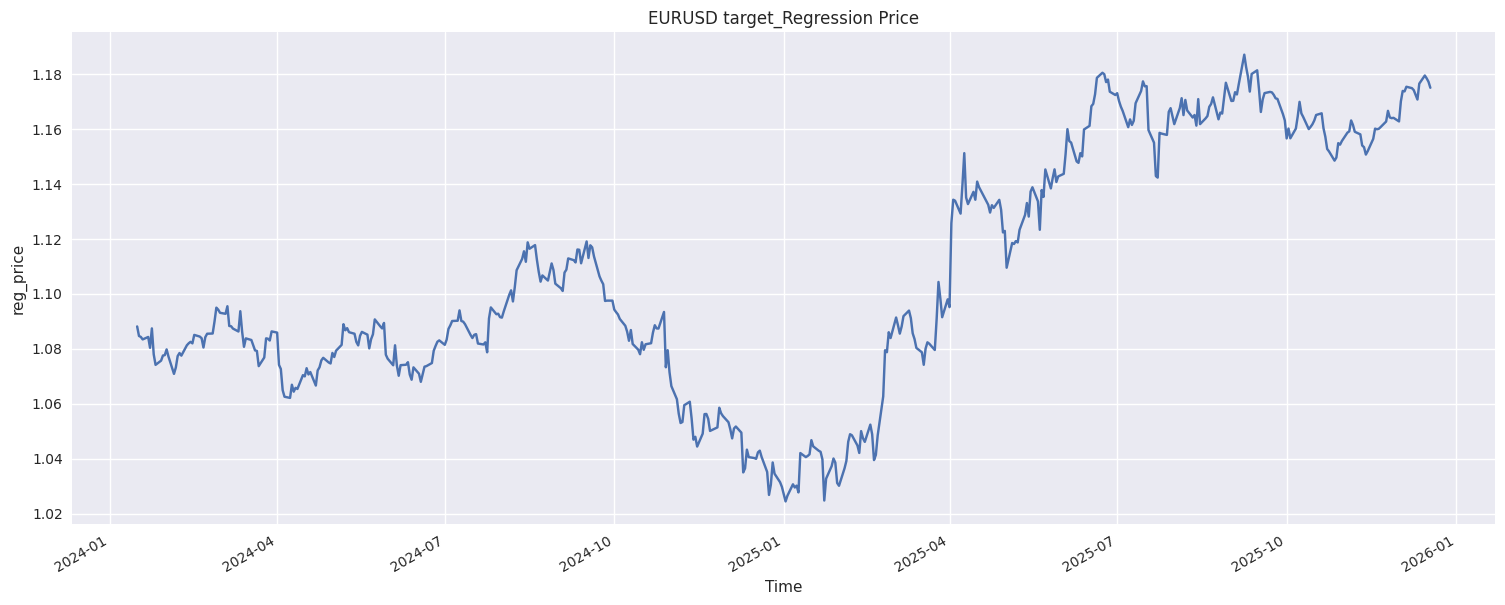

In [18]:
# Regression
df_regr = df.tail(500)
ax = df_regr.plot(y = 'Target_Reg', figsize = (15, 6), legend = False)
ax.set_ylabel('reg_price')
ax.set_xlabel('Time')
ax.set_title('EURUSD target_Regression Price')
plt.tight_layout()

In [19]:
# Classification
class_counts = df['Target_Class'].value_counts().sort_index()

for cls, count in class_counts.items(): 
    label = 'SELL' if cls == -1 else 'HOLD' if cls == 0 else 'BUY'
    print(f"{label}: {count} ({count/len(df):.1%})")

print(f" Mean: {df['Future_Return_7d'].mean():.2%}")
print(f"std: {df['Future_Return_7d']}")


SELL: 419 (32.9%)
HOLD: 416 (32.7%)
BUY: 438 (34.4%)
 Mean: -0.01%
std: Date
2021-01-28   -0.004651
2021-01-29   -0.005482
2021-02-01   -0.000319
2021-02-02    0.004352
2021-02-03    0.007679
                ...   
2025-12-12    0.002259
2025-12-15    0.004931
2025-12-16    0.002616
2025-12-17    0.001978
2025-12-18    0.000729
Name: Future_Return_7d, Length: 1273, dtype: float64


The dependent variable contains  3  unique labels: [ 0 -1  1]

Percentage of "0" labels: 32.68%
Percentage of "-1" labels: 32.91%
Percentage of "1" labels: 34.41%


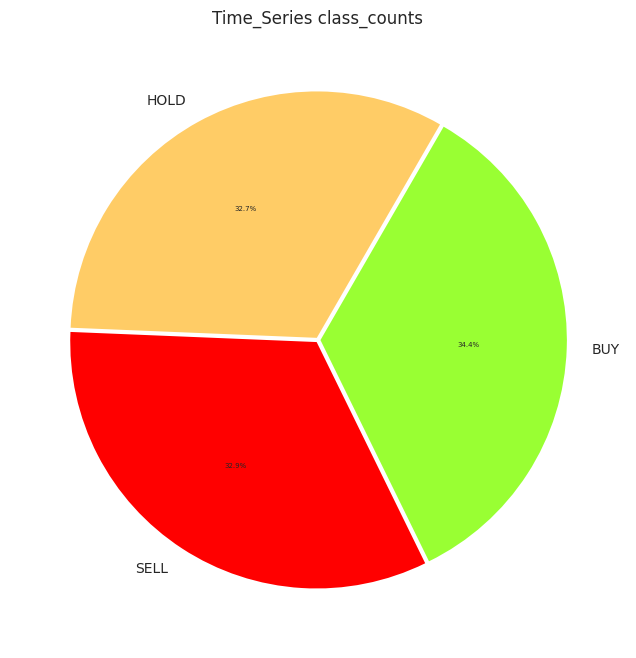

In [20]:
# multiclassification target
print('The dependent variable contains ', len(df['Target_Class'].unique()), ' unique labels:', df['Target_Class'].unique())

print('\nPercentage of "0" labels: {:.2%}'.format(list(df['Target_Class']).count(0) / len(df['Target_Class'])))
print('Percentage of "-1" labels: {:.2%}'.format(list(df['Target_Class']).count(-1) / len(df['Target_Class'])))
print('Percentage of "1" labels: {:.2%}'.format(list(df['Target_Class']).count(1) / len(df['Target_Class'])))

target = list()
target.append(list(df['Target_Class']).count(0) / len(df['Target_Class']))
target.append(list(df['Target_Class']).count(-1) / len(df['Target_Class']))
target.append(list(df['Target_Class']).count(1) / len(df['Target_Class']))

plt.figure(figsize=[12, 8])
tr_labels = ['HOLD', "SELL", "BUY"]
colors=[ '#FFCC66', 'red','#99FF33' ]
plt.pie(target, labels=tr_labels, autopct='%.1f%%', colors=colors, startangle=60, explode=[0.01]*len(tr_labels))
plt.title('Time_Series class_counts')
plt.show()

<font centor size = 5 color='yellow'>So we can see what our data is balanced

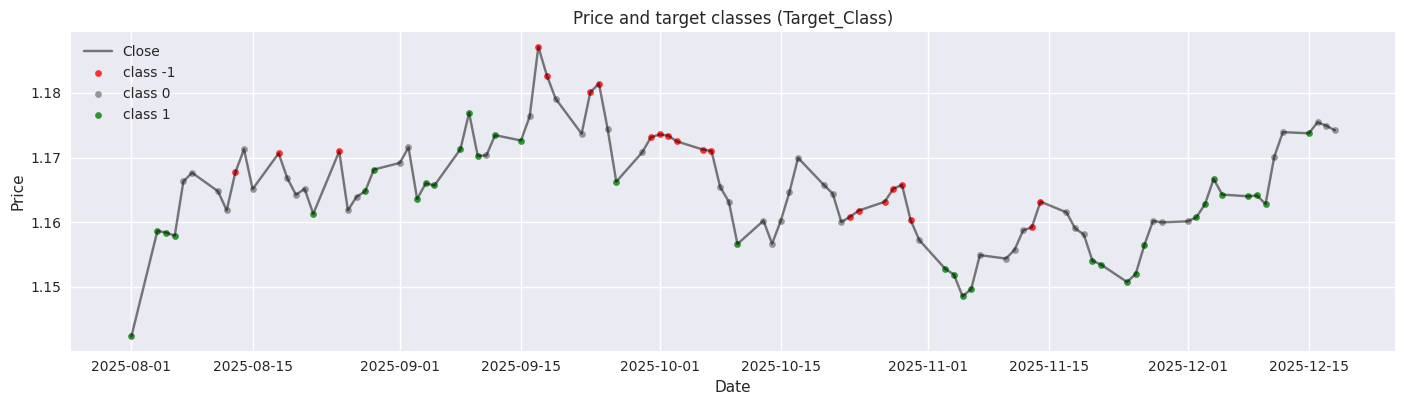

In [21]:
fig, ax = plt.subplots(figsize=(14, 4))
colors = {-1: 'red', 0: 'gray', 1: 'green'}

segment = df_plot.copy()
ax.plot(segment.index, segment['Close'], color='black', alpha=0.5, label='Close')

for cls, c in colors.items(): 
    mask = segment['Target_Class'] == cls 
    ax.scatter(segment.index[mask], 
               segment['Close'][mask], 
               color=c, s=20, label=f"class {cls}", alpha=0.8)

ax.set_title('Price and target classes (Target_Class)')
ax.set_xlabel('Date')
ax.set_ylabel("Price")
ax.legend()
plt.tight_layout()
plt.show()

<font size=4 color='purple'>target classes: green (buy), red (sell), gray (hold). This helps to visually understand where the strategy would like to go in/doesn't go in

In [22]:
for variables in df: 
    print(variables, ' - number of labels: ', df[variables].nunique())
print()
print('Total number of labels: ', len(df))

('Close', 'EURUSD=X')  - number of labels:  1190
('High', 'EURUSD=X')  - number of labels:  1139
('Low', 'EURUSD=X')  - number of labels:  1208
('Open', 'EURUSD=X')  - number of labels:  1195
('Volume', 'EURUSD=X')  - number of labels:  1
('EMA_8', '')  - number of labels:  1273
('EMA_13', '')  - number of labels:  1273
('EMA_21', '')  - number of labels:  1273
('EMA_34', '')  - number of labels:  1273
('EMA_55', '')  - number of labels:  1273
('EMA_100', '')  - number of labels:  1273
('High_20', '')  - number of labels:  311
('Low_20', '')  - number of labels:  335
('Fib_0.236', '')  - number of labels:  599
('Fib_0.382', '')  - number of labels:  599
('Fib_0.5', '')  - number of labels:  599
('Fib_0.628', '')  - number of labels:  599
('Fib_0.786', '')  - number of labels:  599
('RSI', '')  - number of labels:  1273
('MACD', '')  - number of labels:  1273
('MACD_signal', '')  - number of labels:  1273
('MACD_diff', '')  - number of labels:  1273
('Returns', '')  - number of labels: 

In [23]:
# I can drop Volume because it not give me some inside
df = df.drop(['Volume'], axis=1)

In [24]:
df.head()

Price          Close      High       Low      Open     EMA_8    EMA_13  \
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X                       
Date                                                                     
2021-01-28  1.210507  1.214400  1.208240  1.210478  1.214161  1.214955   
2021-01-29  1.212004  1.215701  1.209599  1.212136  1.213679  1.214516   
2021-02-01  1.212386  1.213607  1.206913  1.212283  1.213391  1.214201   
2021-02-02  1.206869  1.208795  1.201836  1.206768  1.211937  1.213122   
2021-02-03  1.203905  1.204999  1.200495  1.203905  1.210148  1.211772   

Price         EMA_21    EMA_34    EMA_55   EMA_100  ... MACD_diff   Returns  \
Ticker                                              ...                       
Date                                                ...                       
2021-01-28  1.215853  1.216604  1.217135  1.217548  ... -0.000031 -0.004762   
2021-01-29  1.215448  1.216234  1.216792  1.217228  ... -0.000069  0.001236   
2021-02-01  1.215131  1.215931  1.216506  1.216959  ... -0.000055  0.000315   
2021-02-02  1.214285  1.215233  1.215899  1.216417  ... -0.000329 -0.004550   
2021-02-03  1.213235  1.214377  1.215163  1.215767  ... -0.000631 -0.002456   

Price      DayOfWeek month day_of_month week Future_Price_7d Future_Return_7d  \
Ticker                                                                          
Date                                                                            
2021-01-28         3     1           28    4        1.204877        -0.004651   
2021-01-29         4     1           29    4        1.205360        -0.005482   
2021-02-01         0     2            1    5        1.211999        -0.000319   
2021-02-02         1     2            2    5        1.212121         0.004352   
2021-02-03         2     2            3    5        1.213151         0.007679   

Price      Target_Class Target_Reg  
Ticker                              
Date                                
2021-01-28            0   1.204877  
2021-01-29           -1   1.205360  
2021-02-01            0   1.211999  
2021-02-02            1   1.212121  
2021-02-03            1   1.213151  

[5 rows x 30 columns]

<center><font centor size = 8 color='green'>7 days forward

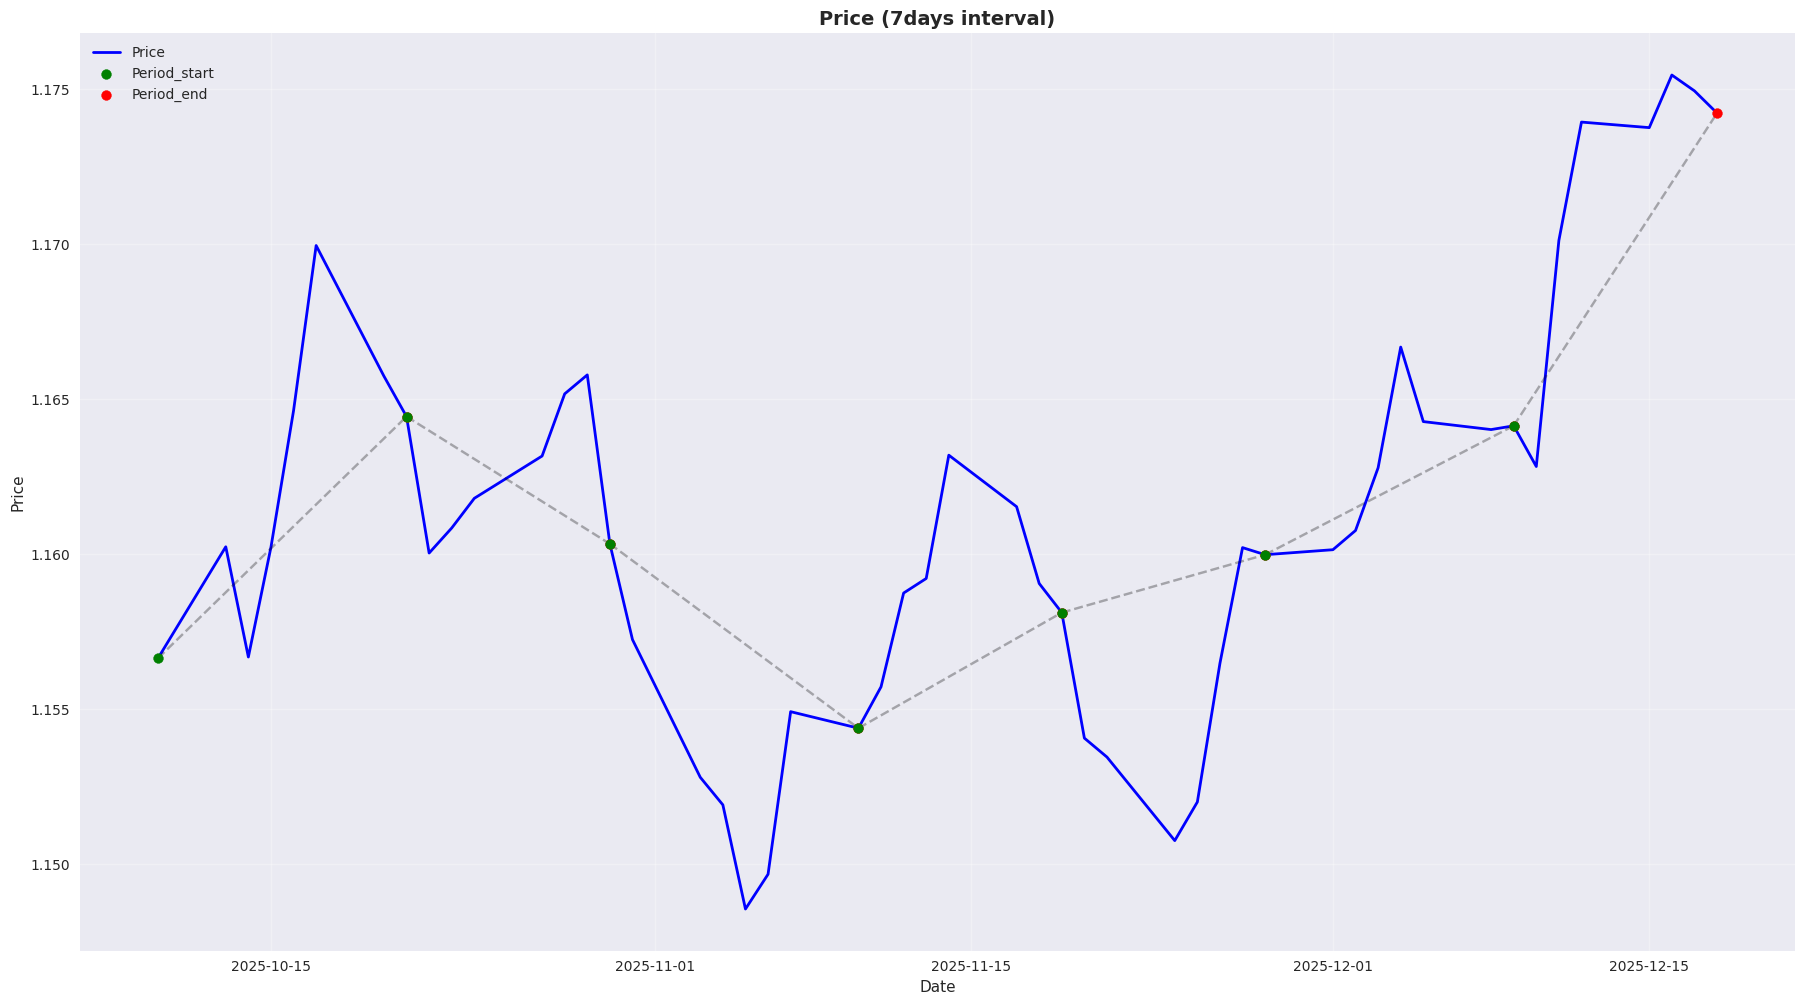

In [25]:
fig, ax = plt.subplots(figsize=(18, 10))

recent = df.tail(50)
ax.plot(
    recent.index,
    recent['Close'],
    label = 'Price', 
    linewidth=2, 
    color='blue'
    )

for i in range(0, len(recent), 7): 
    if i + 7 < len(recent): 
        ax.scatter(recent.index[i], recent['Close'].iloc[i],
                color='green', s=50, zorder=5)
        ax.scatter(recent.index[i+7], recent['Close'].iloc[i+7], 
                color='red', s=50, zorder=5)
        ax.plot([recent.index[i], recent.index[i+7]], 
                [recent['Close'].iloc[i], recent['Close'].iloc[i+7]], 
                'k--', alpha=0.3)
ax.set_title('Price (7days interval)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(['Price', 'Period_start', 'Period_end'])
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<center><font centor size = 8 color='green'>7-day returns

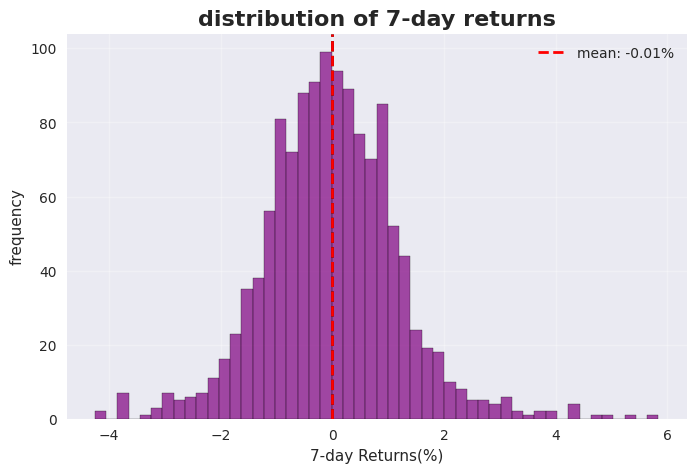

In [26]:
# Average 7-day return
fig, ax = plt.subplots(figsize=[8, 5])
ax.hist(df['Future_Return_7d'] * 100, bins=50, alpha=0.7, 
        color='purple', edgecolor='black')

ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax.axvline(x=df['Future_Return_7d'].mean() * 100,
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'mean: {df["Future_Return_7d"].mean()*100:.2f}%')
ax.set_title('distribution of 7-day returns',
        fontsize=16, 
        fontweight='bold')
ax.set_xlabel('7-day Returns(%)')
ax.set_ylabel('frequency')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


<font color='green' size=3>Histogram (purple bars) - shows how often different return values occur
Black dashed line - zero return level

Red dashed line - mean return over 7 days

If bars are to the right of zero - positive returns (price went up)

If bars are to the left of zero - negative returns (price went down)

Bar height - how many times this return occurred

Red line position - average return over the entire period



<center><font center size = 5 color='red'>

In [27]:
print("7-day return statistics:")
print(f"mean: {df['Future_Return_7d'].mean()*100:.2f}%")
print(f"Median: {df['Future_Return_7d'].median()*100:.2f}%")
print(f"Std: {df['Future_Return_7d'].std()*100:.2f}%")
print(f"Min: {df['Future_Return_7d'].min()*100:.2f}%")
print(f"Max: {df['Future_Return_7d'].max()*100:.2f}%")

# Percentage of positive returns
positive_returns = (df['Future_Return_7d'] > 0).sum() / len(df) * 100
print(f"Positive returns procent: {positive_returns:.1f}%")

Статистика 7-дневной доходности:
mean: -0.01%
Median: -0.03%
Std: 1.21%
Min: -4.25%
Max: 5.84%
Positive returns procent: 48.3%


<center><font center size=5 color='red'>Class counts

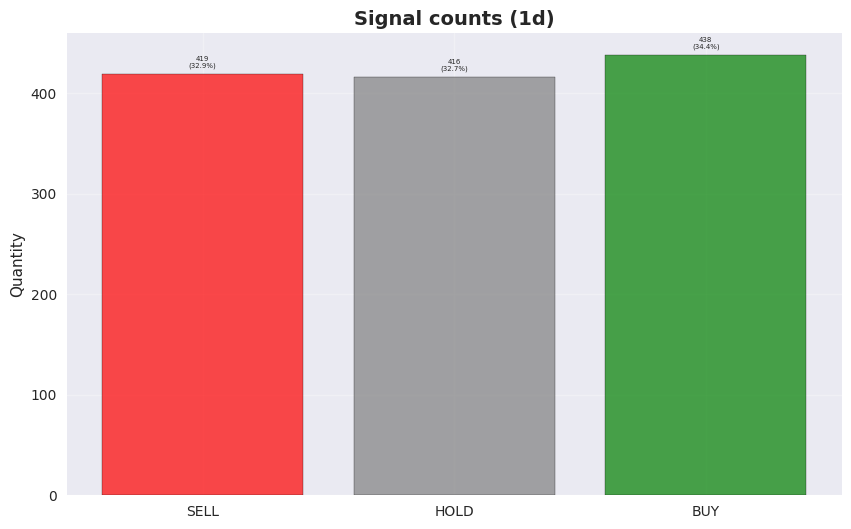

In [28]:
fig, ax = plt.subplots(figsize=[10, 6])

clas_counts = df['Target_Class'].value_counts().sort_index()
colors = ['red', 'gray', 'green']
labels = ['SELL', 'HOLD', 'BUY']

bars = ax.bar(labels, class_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_title('Signal counts (1d)', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantity')

for bar, count in zip(bars, class_counts.values): 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5, 
            f'{count}\n({count/len(df):.1%})', 
            ha='center', va='bottom')
ax.grid(True, alpha=0.3)
plt.show()

<font center size=6 color="red">Features Correlation 

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

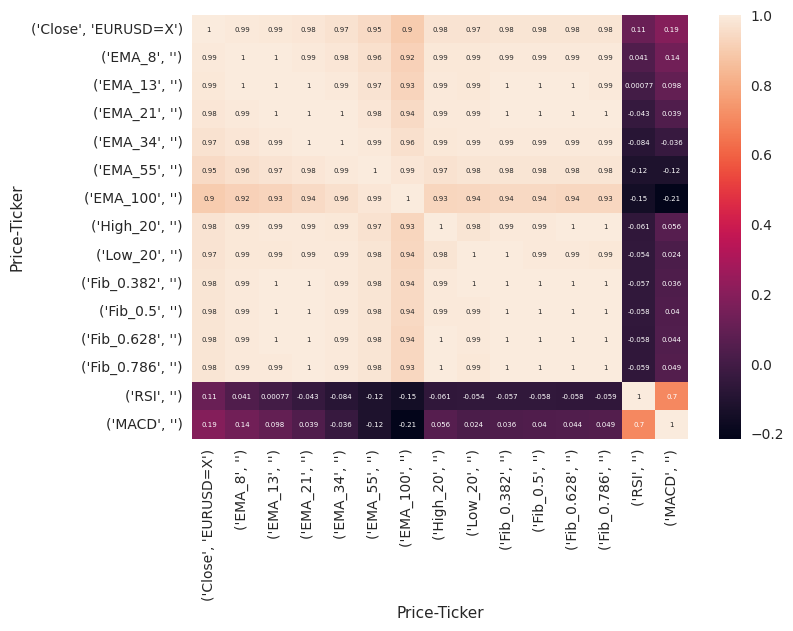

In [29]:
corr_features = ['Close', 'EMA_8', 'EMA_13', 
                'EMA_21', 'EMA_34', 'EMA_55', 
                'EMA_100', 'High_20', 'Low_20',
                'Fib_0.382', 'Fib_0.5', 'Fib_0.628', 
                'Fib_0.786', 'RSI', 'MACD']
corr = df[corr_features].corr()

sns.heatmap( 
    corr, 
    annot= True, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

<center><font center size=6 color='red'> Model Prepare

In [30]:
def prepare_model_data_7day(df, seq_length=30):

    feature_cols = [
        'Close', 'EMA_8', 'EMA_13', 'EMA_21', 
        'EMA_34', 'EMA_55', 'EMA_100', 
        'MACD_signal',    'MACD_diff',    'Returns',    
        'DayOfWeek',    'Month',    'WeekOfYear', 
        'Future_Price_7d',    'Future_Return_7d',
        'RSI', 'MACD', 'High_20', 'Low_20', 
        'Fib_0.236', 'Fib_0.382', 'Fib_0.5', 
        'Fib_0.628', 'Fib_0.786' 
    ]

    available_cols = [col for col in feature_cols if col in df.columns]
    print('use ', len(available_cols), ' features')

    X = df[available_cols].values
    y_class = df['Target_Class'].values + 1 # Change -1,0,1 to 0,1,2
    y_reg = df['Target_Reg'].values #Price then 7-day

    print('Size X: ', X.shape)
    print('Size y_class: ', y_class.shape)
    print('Size y_reg: ', y_reg.shape)

    # TimeSeries think train/test split
    split_idx = int(len(X) * 0.8)

    X_train = X[:split_idx]
    X_test = X[split_idx:]

    y_class_train = y_class[:split_idx]
    y_class_test = y_class[split_idx:]

    y_reg_train = y_reg[:split_idx]
    y_reg_test = y_reg[split_idx:]

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.fit_transform(X_test)

    scaler_y = StandardScaler()
    y_reg_train_scaled = scaler_y.fit_transform(y_reg_train.reshape(-1, 1)).flatten()
    y_reg_test_scaled = scaler_y.transform(y_reg_test.reshape(-1, 1)).flatten()


    #For lstm 
    X_train_seq, y_class_train_seq, y_reg_train_seq = [], [], []
    X_test_seq, y_class_test_seq, y_reg_test_seq = [], [], []

    scaler_lstm_X = MinMaxScaler()
    scaler_lstm_y = MinMaxScaler()

    X_scaled_all = scaler_lstm_X.fit_transform(X)
    y_reg_scaled_all = scaler_lstm_y.fit_transform(y_reg.reshape(-1, 1)).flatten()

    for i in range(seq_length, split_idx): 
        X_train_seq.append(X_scaled_all[i-seq_length:i])
        y_class_train_seq.append(y_class[i])
        y_reg_train_seq.append(y_reg_scaled_all[i])

    for i in range(split_idx + seq_length, len(X_scaled_all)): 
        X_test_seq.append(X_scaled_all[i-seq_length:i])
        y_class_test_seq.append(y_class[i])
        y_reg_test_seq.append(y_reg_scaled_all[i])

    X_train_seq = np.array(X_train_seq)
    X_test_seq = np.array(X_test_seq)

    y_class_train_seq = np.array(y_class_train_seq)
    y_class_test_seq = np.array(y_class_test_seq)

    y_reg_train_seq = np.array(y_reg_train_seq)
    y_reg_test_seq = np.array(y_reg_test_seq)

    print("Sizes for LSTM: ")
    print("X_train_seq: ", X_train_seq.shape)
    print('X_test_seq: ', X_test_seq.shape)

    return {
    # For traditional models
    'X_train': X_train_scaled, 'X_test': X_test_scaled,
    'y_class_train': y_class_train, 'y_class_test': y_class_test,
    'y_reg_train': y_reg_train_scaled, 'y_reg_test': y_reg_test_scaled,
    'y_reg_original_train': y_reg_train, 'y_reg_original_test': y_reg_test,

    # For LSTM
    'X_train_seq': X_train_seq, 'X_test_seq': X_test_seq,
    'y_class_train_seq': y_class_train_seq, 'y_class_test_seq': y_class_test_seq,
    'y_reg_train_seq': y_reg_train_seq, 'y_reg_test_seq': y_reg_test_seq,

    # Scalers
    'scaler_X': scaler_X,
    'scaler_y': scaler_y,
    'scaler_lstm_X': scaler_lstm_X,
    'scaler_lstm_y': scaler_lstm_y,

    'feature_cols': available_cols,
    'seq_length': seq_length
    }

df_dict = prepare_model_data_7day(df, seq_length=30)

use  22  features
Size X:  (1273, 22)
Size y_class:  (1273,)
Size y_reg:  (1273,)
Sizes for LSTM: 
X_train_seq:  (988, 30, 22)
X_test_seq:  (225, 30, 22)


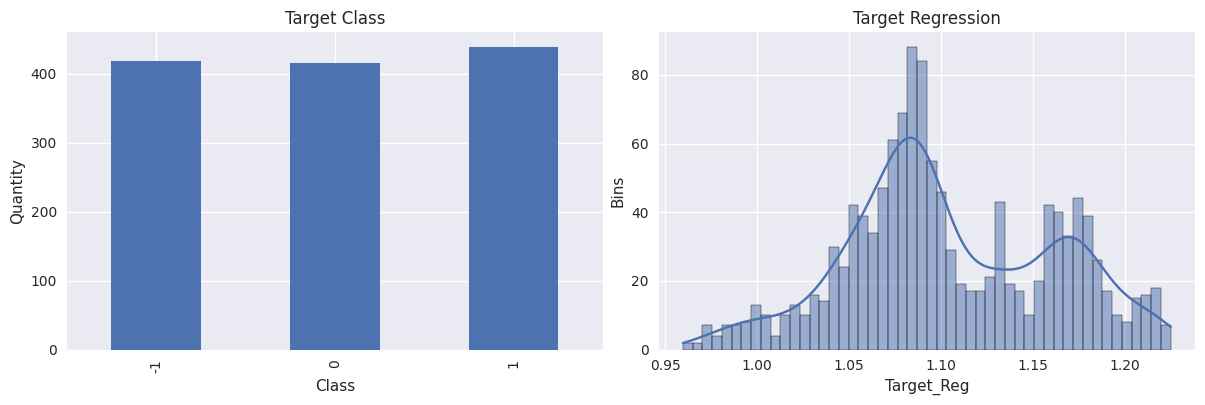

In [31]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

# classes
df['Target_Class'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Target Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Quantity')

# regres
sns.histplot(df['Target_Reg'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Target Regression')
ax[1].set_xlabel('Target_Reg')
ax[1].set_ylabel('Bins')

plt.tight_layout()
plt.show()



<center><font center size=6 color='red'> Models training

In [32]:
class_models = {}
class_results = {}
class_metrics = {}

In [33]:
def plot_confusion(y_true, t_pred, title='Confusion matrix'): 
    cm = confusion_matrix(df_dict['y_class_test'], y_pred)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=[4, 4])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

def plot_roc_pr(y_true, y_proba, pos_label=1, title_prefix=''): 
    #ROC
    fpr, tpr, _ = roc_curve(df_dict['y_class_test'], y_proba, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_title(f"{title_prefix} Roc-curve")
    ax[0].set_xlabel('(fpr) False Positive Rate')
    ax[0].set_ylabel('(tpr)True Positive Rate')
    ax[0].legend()


    #PR 
    precision, recall, _ = precision_recall_curve(df_dict['y_class_test'], y_proba,
    pos_label=pos_label) 
    pr_auc = auc(recall, precision)

    ax[1].plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
    ax[1].set_title(f'{title_prefix} Precision-Recall curve')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].legend()

    plt.tight_layout()
    plt.show()



<center><font center size=6 color='green'> Rf_classification

In [34]:
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
randomforest_classifier.fit(df_dict['X_train'], df_dict['y_class_train'])

#GridSearch
parameters = [
    {
        'criterion' : ['gini','entropy','log_loss'],
        'n_estimators':[100, 200, 500],
        'max_depth': [5, 6, 10]
     }
]

grid_search = GridSearchCV(
    estimator = randomforest_classifier,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
)

grid_search.fit(df_dict['X_train'], df_dict['y_class_train'])
best_parameters = grid_search.best_params_
print('Best parameters: ', best_parameters)

model = grid_search.best_estimator_

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


In [35]:
#RF classific. 
rf_classifier = RandomForestClassifier( 
    n_estimators = 500,
    criterion='entropy',  
    max_depth = 10, 
    random_state = 42, 
    n_jobs=-1
)

rf_classifier.fit(df_dict["X_train"], df_dict['y_class_train'])
y_pred = rf_classifier.predict(df_dict['X_test'])
y_proba_rf = rf_classifier.predict_proba(df_dict['X_test'])
accuracy = accuracy_score(df_dict['y_class_test'], y_pred)
auc_rf = roc_auc_score(df_dict['y_class_test'], y_proba_rf, multi_class='ovr')
report_dict = classification_report(df_dict['y_class_test'], y_pred, output_dict=True, 
zero_division=0)
class_metrics['rf_class_report'] = report_dict


class_models['random_forest'] = rf_classifier
class_results['random_forest'] = { 
    'accuracy': accuracy,
    'auc': auc_rf, 
    'predictions': y_pred, 
    'model': rf_classifier,
    'metrics': class_metrics['rf_class_report']
}
print(f"Accuracy: {accuracy:.3f}\n")
print(f'AUC: {auc_rf:.3f}')
class_metrics['rf_class_report']




Accuracy: 0.710

AUC: 0.861


{'0': {'precision': 0.6703296703296703,
  'recall': 1.0,
  'f1-score': 0.8026315789473685,
  'support': 61.0},
 '1': {'precision': 0.5416666666666666,
  'recall': 0.6341463414634146,
  'f1-score': 0.5842696629213483,
  'support': 82.0},
 '2': {'precision': 1.0,
  'recall': 0.6071428571428571,
  'f1-score': 0.7555555555555554,
  'support': 112.0},
 'accuracy': 0.7098039215686275,
 'macro avg': {'precision': 0.7373321123321123,
  'recall': 0.747096399535424,
  'f1-score': 0.7141522658080907,
  'support': 255.0},
 'weighted avg': {'precision': 0.7737520649285355,
  'recall': 0.7098039215686275,
  'f1-score': 0.7117367094022049,
  'support': 255.0}}

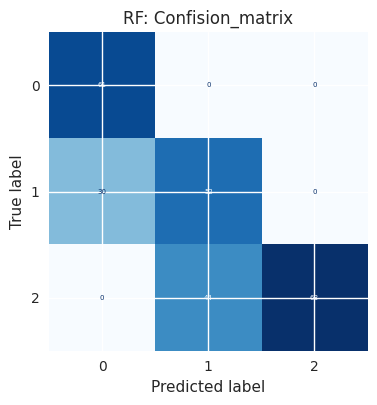

In [36]:
plot_confusion(df_dict['y_class_test'], y_pred, title='RF: Confision_matrix')

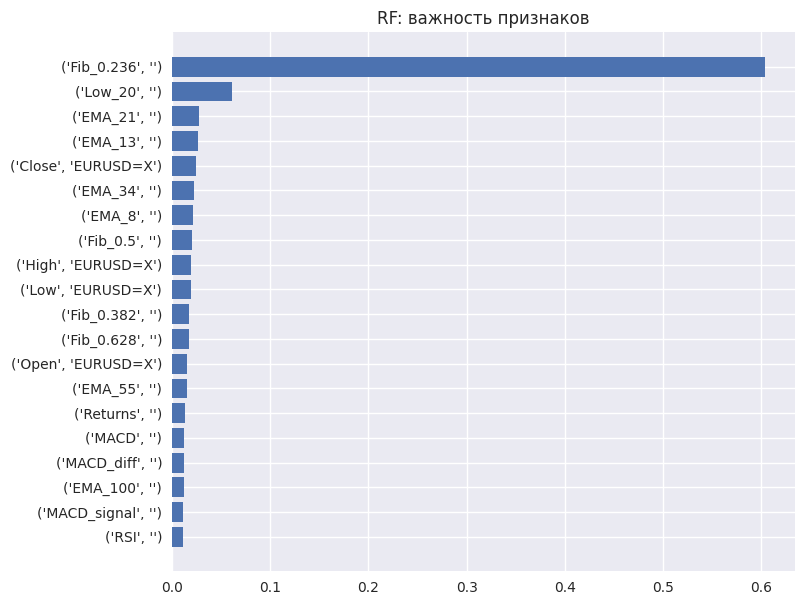

In [37]:
def plot_importances(model, feature_names, top_n=10, title='Feature importance'):
    importances = model.feature_importances_ 
    idx = np.argsort(importances)[::-1][:top_n]
    imp_vals = importances[idx]
    names = np.array(feature_names)[idx]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(range(len(imp_vals)), imp_vals[::-1])
    ax.set_yticks(range(len(imp_vals)))
    ax.set_yticklabels(names[::-1])
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# example:
plot_importances(rf_classifier, df.columns, top_n=20, title="RF: Feature Importance")

<center><font center size=6 color='green'> xgboost classification

In [38]:
#Xgboost 
xgb_classifier = xgb.XGBClassifier( 
    n_estimators = 100, 
    max_depth = 6, 
    learning_rate=0.1, 
    random_state=42, 
    n_jobs=-1
)
xgb_classifier.fit(df_dict['X_train'], df_dict['y_class_train'])

y_pred = xgb_classifier.predict(df_dict['X_test'])
y_proba_xgb =  xgb_classifier.predict_proba(df_dict['X_test'])
accuracy = accuracy_score(df_dict['y_class_test'], y_pred)
auc = roc_auc_score(df_dict['y_class_test'], y_proba_xgb, multi_class='ovr')
report_dict = classification_report(df_dict['y_class_test'], y_pred, output_dict=True, 
zero_division=0)
class_metrics['xgb_class'] = report_dict


class_models['xgboost'] = xgb_classifier 
class_results['xgboost'] = { 
    'accuracy': accuracy,
    'predictions': y_pred,
    'auc': auc,  
    'model': xgb_classifier, 
    'metrics': class_metrics['xgb_class']
}

print(f'Accuracy: {accuracy:.3f}')
print(f'AUC: {auc:.3f}')
class_metrics['xgb_class']

Accuracy: 0.722
AUC: 0.840


{'0': {'precision': 0.6777777777777778,
  'recall': 1.0,
  'f1-score': 0.8079470198675497,
  'support': 61.0},
 '1': {'precision': 0.5578947368421052,
  'recall': 0.6463414634146342,
  'f1-score': 0.5988700564971751,
  'support': 82.0},
 '2': {'precision': 1.0,
  'recall': 0.625,
  'f1-score': 0.7692307692307693,
  'support': 112.0},
 'accuracy': 0.7215686274509804,
 'macro avg': {'precision': 0.7452241715399609,
  'recall': 0.7571138211382115,
  'f1-score': 0.7253492818651647,
  'support': 255.0},
 'weighted avg': {'precision': 0.7807522073156749,
  'recall': 0.7215686274509804,
  'f1-score': 0.72370964313151,
  'support': 255.0}}

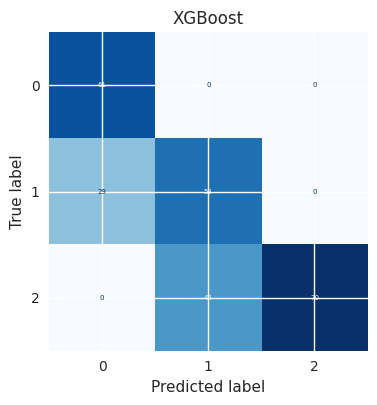

In [39]:
plot_confusion(df_dict['y_class_test'], y_pred, title='XGBoost')


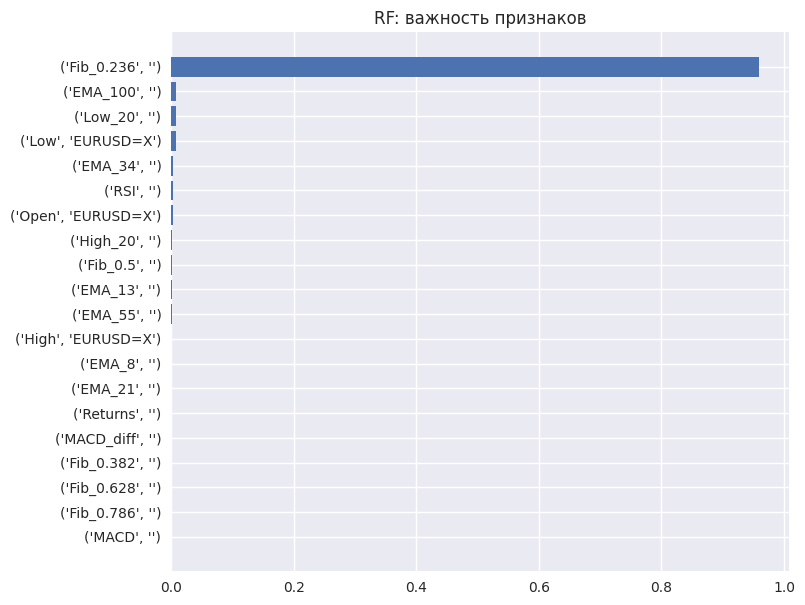

In [40]:
def plot_importances(model, feature_names, top_n=10, title='Feature importance'):
    importances = model.feature_importances_ 
    idx = np.argsort(importances)[::-1][:top_n]
    imp_vals = importances[idx]
    names = np.array(feature_names)[idx]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(range(len(imp_vals)), imp_vals[::-1])
    ax.set_yticks(range(len(imp_vals)))
    ax.set_yticklabels(names[::-1])
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# example:
plot_importances(xgb_classifier, df.columns, top_n=20, title="XGB: Feature Importance")

<center><font center size=6 color='green'> lgbm classification

In [41]:
#lightGBM
lgb_class = lgb.LGBMClassifier( 
    n_estimators=100, 
    max_depth=5, 
    learning_rate=0.1,
    random_state=42, 
    n_jobs=-1, 
)
lgb_class.fit(df_dict['X_train'], df_dict['y_class_train'])
y_pred = lgb_class.predict(df_dict['X_test'])
y_proba_lgbm = lgb_class.predict_proba(df_dict['X_test'])
auc_lgbm = roc_auc_score(df_dict['y_class_test'], y_proba_lgbm, multi_class='ovo')
accuracy = accuracy_score(df_dict['y_class_test'], y_pred)
report_dict = classification_report(df_dict['y_class_test'], y_pred, output_dict=True, 
zero_division=0)
class_metrics['lgb_class'] = report_dict

class_models['lightgbm'] = lgb_class
class_results['lightgbm'] = { 
    'accuracy': accuracy, 
    'auc': auc_lgbm,
    'prediction': y_pred, 
    'model': lgb_class,
    'metrics': class_metrics['lgb_class']
}

print(f'Accuracy: {accuracy:.3f}')
print(f'auc: {auc_lgbm:.3f}')

class_metrics['lgb_class']


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5222
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 22
[LightGBM] [Info] Start training from score -1.045062
[LightGBM] [Info] Start training from score -1.114454
[LightGBM] [Info] Start training from score -1.138698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

{'0': {'precision': 0.6777777777777778,
  'recall': 1.0,
  'f1-score': 0.8079470198675497,
  'support': 61.0},
 '1': {'precision': 0.5578947368421052,
  'recall': 0.6463414634146342,
  'f1-score': 0.5988700564971751,
  'support': 82.0},
 '2': {'precision': 1.0,
  'recall': 0.625,
  'f1-score': 0.7692307692307693,
  'support': 112.0},
 'accuracy': 0.7215686274509804,
 'macro avg': {'precision': 0.7452241715399609,
  'recall': 0.7571138211382115,
  'f1-score': 0.7253492818651647,
  'support': 255.0},
 'weighted avg': {'precision': 0.7807522073156749,
  'recall': 0.7215686274509804,
  'f1-score': 0.72370964313151,
  'support': 255.0}}

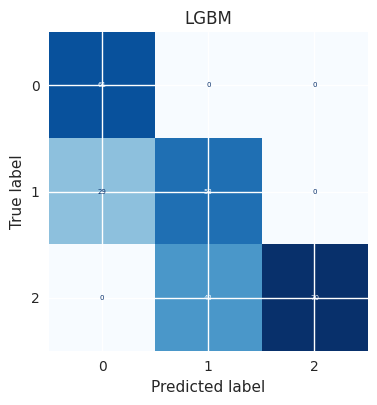

In [42]:
plot_confusion(df_dict['y_class_test'], y_pred, title='LGBM')

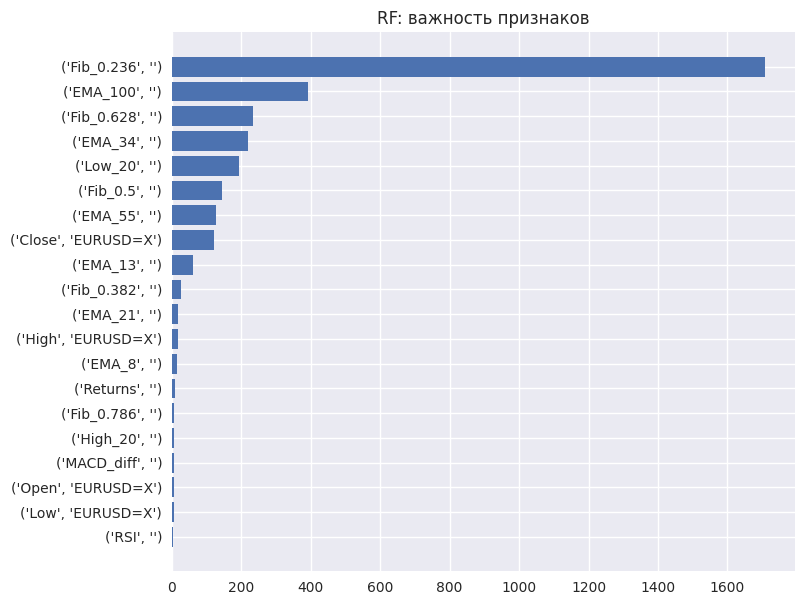

In [43]:
def plot_importances(model, feature_names, top_n=10, title='Feature importance'):
    importances = model.feature_importances_ 
    idx = np.argsort(importances)[::-1][:top_n]
    imp_vals = importances[idx]
    names = np.array(feature_names)[idx]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(range(len(imp_vals)), imp_vals[::-1])
    ax.set_yticks(range(len(imp_vals)))
    ax.set_yticklabels(names[::-1])
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# example:
plot_importances(lgb_class, df.columns, top_n=20, title="LGBM: Feature Importance")

<center><font center size=6 color='green'> SVC classification

In [44]:
svc_classifier = SVC(kernel = 'linear', probability = True, random_state=0)
svc_classifier.fit(df_dict['X_train'], df_dict['y_class_train'])

#GridSearch
parameters = [
    {
        'C':[1, 5, 6],
        'kernel':['linear', 'rbf']
     }
]

grid_search = GridSearchCV(
    estimator = svc_classifier,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
)

grid_search.fit(df_dict['X_train'], df_dict['y_class_train'])
best_parameters = grid_search.best_params_
print('Best parameters: ', best_parameters)

model = grid_search.best_estimator_

Best parameters:  {'C': 5, 'kernel': 'linear'}


In [45]:
svc = SVC( 
    C=5, 
    kernel='linear', 
    probability=True, 
    random_state=42
)
svc.fit(df_dict['X_train'], df_dict['y_class_train'])

y_pred = svc.predict(df_dict['X_test'])
y_proba_svc = svc.predict_proba(df_dict['X_test'])
accuracy = accuracy_score(df_dict['y_class_test'], y_pred)
auc_svc = roc_auc_score(df_dict['y_class_test'], y_proba_svc, multi_class='ovo')
report_dict = classification_report(df_dict['y_class_test'], y_pred, output_dict=True, 
zero_division=0)
class_metrics['svc'] = report_dict

class_models['svc'] = svc
class_results['svc'] = { 
    'accuracy': accuracy, 
    'auc':auc_svc,
    'predictions': y_pred, 
    'model': svc,
    'metrics': class_metrics['svc']
}

print(f'Accuracy: {accuracy:.3f}')
print(f"AUC: {auc_svc:.3f}")
class_metrics['svc']

Accuracy: 0.706
AUC: 0.923


{'0': {'precision': 0.6630434782608695,
  'recall': 1.0,
  'f1-score': 0.7973856209150326,
  'support': 61.0},
 '1': {'precision': 0.5368421052631579,
  'recall': 0.6219512195121951,
  'f1-score': 0.576271186440678,
  'support': 82.0},
 '2': {'precision': 1.0,
  'recall': 0.6071428571428571,
  'f1-score': 0.7555555555555554,
  'support': 112.0},
 'accuracy': 0.7058823529411765,
 'macro avg': {'precision': 0.7332951945080092,
  'recall': 0.7430313588850175,
  'f1-score': 0.7097374543037555,
  'support': 255.0},
 'weighted avg': {'precision': 0.7704576659038901,
  'recall': 0.7058823529411765,
  'f1-score': 0.7079097348477442,
  'support': 255.0}}

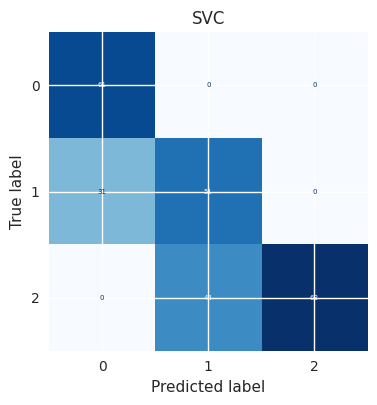

In [46]:
plot_confusion(df_dict['y_class_test'], y_pred, title='SVC')

In [47]:
# Choice best model 
class_best_model_name = max(class_results.items(), key=lambda x: x[1]['auc'])[0]
class_best_model = class_models[class_best_model_name]
class_best_auc = class_results[class_best_model_name]['auc']
print('BEST MODEL')
print(f"best model: {class_best_model_name}")
print(f'best Accuracy: {class_best_auc:.3f}')

BEST MODEL
best model: svc
best Accuracy: 0.923


<center><font center size=6 color='red'> Regression Models

In [48]:
reg_models = {}
reg_results = {}


<center><font center size=6 color='green'> Rf_regression

In [49]:
rf_regressor = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
rf_regressor.fit(df_dict['X_train'], df_dict['y_reg_train'])

y_pred_scaled = rf_regressor.predict(df_dict['X_test'])
y_pred = df_dict['scaler_y'].inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(df_dict['y_reg_original_test'], y_pred)
r2 = r2_score(df_dict['y_reg_original_test'], y_pred)
mape = mean_absolute_percentage_error(df_dict['y_reg_original_test'], y_pred) * 100

reg_models['random_forest'] = rf_regressor
reg_results['random_forest'] = {
    'mae': mae,
    'r2': r2,
    'mape': mape,
    'predictions': y_pred,
    'model': rf_regressor
}
print(f"  MAE: {mae:.4f}, R2: {r2:.4f}, MAPE: {mape:.2f}%")

  MAE: 0.0337, R2: 0.5080, MAPE: 3.01%


<center><font center size=6 color='green'> XGB_regression

In [50]:
xgb_regressor = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
xgb_regressor.fit(df_dict['X_train'], df_dict['y_reg_train'])

y_pred_scaled = xgb_regressor.predict(df_dict['X_test'])
y_pred = df_dict['scaler_y'].inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(df_dict['y_reg_original_test'], y_pred)
r2 = r2_score(df_dict['y_reg_original_test'], y_pred)
mape = mean_absolute_percentage_error(df_dict['y_reg_original_test'], y_pred) * 100

reg_models['xgboost'] = xgb_regressor
reg_results['xgboost'] = {
    'mae': mae,
    'r2': r2,
    'mape': mape,
    'predictions': y_pred,
    'model': xgb_regressor
}
print(f"  MAE: {mae:.4f}, R2: {r2:.4f}, MAPE: {mape:.2f}%")

  MAE: 0.0336, R2: 0.5094, MAPE: 3.01%


<center><font center size=6 color='green'> LGBM_regression

In [51]:
lgb_regressor = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.01,
    random_state=42,
    n_jobs=-1
)
lgb_regressor.fit(df_dict['X_train'], df_dict['y_reg_train'])

y_pred_scaled = lgb_regressor.predict(df_dict['X_test'])
y_pred = df_dict['scaler_y'].inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(df_dict['y_reg_original_test'], y_pred)
r2 = r2_score(df_dict['y_reg_original_test'], y_pred)
mape = mean_absolute_percentage_error(df_dict['y_reg_original_test'], y_pred) * 100

reg_models['lightgbm'] = lgb_regressor
reg_results['lightgbm'] = {
    'mae': mae,
    'r2': r2,
    'mape': mape,
    'predictions': y_pred,
    'model': lgb_regressor
}
print(f"  MAE: {mae:.4f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5222
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 22
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<center><font center size=6 color='green'> SVR_regression

In [52]:
svr = SVR(
    C=1.0,
    kernel='rbf'
)
svr.fit(df_dict['X_train'], df_dict['y_reg_train'])

y_pred_scaled = svr.predict(df_dict['X_test'])
y_pred = df_dict['scaler_y'].inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(df_dict['y_reg_original_test'], y_pred)
r2 = r2_score(df_dict['y_reg_original_test'], y_pred)
mape = mean_absolute_percentage_error(df_dict['y_reg_original_test'], y_pred) * 100

reg_models['svr'] = svr
reg_results['svr'] = {
    'mae': mae,
    'r2': r2,
    'mape': mape,
    'predictions': y_pred,
    'model': svr
}
print(f"  MAE: {mae:.4f}, r2: {r2:.4f}, MAPE: {mape:.2f}%")
    

  MAE: 0.0361, r2: 0.4366, MAPE: 3.22%


In [53]:
reg_best_model_name = min(reg_results.items(), key=lambda x: x[1]['mape'])[0]
reg_best_model = reg_models[reg_best_model_name]
reg_best_mae = reg_results[reg_best_model_name]['mae']
reg_best_r2 = reg_results[reg_best_model_name]['r2']
reg_best_mape = reg_results[reg_best_model_name]['mape']

print(f"\nBest regression model: {reg_best_model_name}\n")
print(f"MAE: {reg_best_mae:.4f}, R2: {reg_best_r2:.4f},  MAPE: {reg_best_mape:.2f}%")


Best regression model: lightgbm

MAE: 0.0334, R2: 0.4604,  MAPE: 2.90%


<center><font center size=6 color='green'> LSTM model

In [54]:
def create_lstm_regression_model(input_shape):
    """Create LSTM model for 7-day regression"""
    
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Regression output
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse', 'mape']
    )
    
    model.summary()
    return model


In [55]:
lstm_model = create_lstm_regression_model( 
    input_shape=(df_dict['X_train_seq'].shape[1], 
    df_dict['X_train_seq'].shape[2])
)

# traning 

history = lstm_model.fit( 
    df_dict['X_train_seq'],
    df_dict['y_reg_train_seq'], 
    validation_split=0.2, 
    epochs=30, 
    batch_size=16, 
    callbacks=[ 
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), 
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ], 
    verbose=1
)

y_pred_scaled = lstm_model.predict(df_dict['X_test_seq'], verbose=0)
y_pred = df_dict['scaler_lstm_y'].inverse_transform(y_pred_scaled).flatten()

# inverse with iqual 
y_test_original = df_dict['scaler_lstm_y'].inverse_transform( 
    df_dict['y_reg_test_seq'].reshape(-1, 1)
).flatten()

# Metrics 
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100

print('LSTM metrics: \n')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')
print(f"mape: {mape:.2f}%")




I0000 00:00:1767131163.359899  867846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1767131163.442024  867846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1767131163.442102  867846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1767131163.443765  867846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1767131163.443818  867846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        22,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,777 (139.75 KB)

 Trainable params: 35,777 (139.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


2025-12-31 06:46:06.503474: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0447 - mae: 0.1463 - mape: 82555.6094 - mse: 0.0447 - val_loss: 0.0036 - val_mae: 0.0498 - val_mape: 11.7061 - val_mse: 0.0036 - learning_rate: 0.0010
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mae: 0.0843 - mape: 156687.1562 - mse: 0.0112 - val_loss: 0.0033 - val_mae: 0.0463 - val_mape: 9.7079 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070 - mae: 0.0670 - mape: 213849.2969 - mse: 0.0070 - val_loss: 0.0033 - val_mae: 0.0469 - val_mape: 9.8544 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mae: 0.0608 - mape: 247284.7188 - mse: 0.0061 - val_loss: 0.0018 - val_mae: 0.0346 - val_mape: 7.4576 - val_mse: 0.0018 - learning_rate: 0.0010
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mae: 0.0576 - mape: 129541.5625 - mse: 0.0054 - val_loss: 0.0035 - val_mae: 0.0496 - val_mape: 

In [56]:
lstm_results = { 
    'mae': mae, 
    'r2': r2, 
    'mape': mape, 
    'predictions': y_pred, 
    'model': lstm_model, 
    'history': history
}

<font color='green' size=5>Iquals all models and choise best

In [57]:
# Classificators 

class_comparison = []
for name, result in class_results.items(): 
    class_comparison.append({ 
        'Model': name, 
        'Accuracy': result['accuracy'], 
        'Status': 'Best' if name == class_best_model_name else ''
    })

class_df = pd.DataFrame(class_comparison).sort_values('Accuracy', ascending=False)
print(class_df.to_string(index=False))

        Model  Accuracy Status
      xgboost  0.721569       
     lightgbm  0.721569       
random_forest  0.709804       
          svc  0.705882   Best


<font size=5 color='red'>ML regression models

In [58]:
reg_comparison = []
for name, result in reg_results.items(): 
    reg_comparison.append({
        'Model': name, 
        'MAE': result['mae'], 
        'R2': result['r2'], 
        'MAPE %': result['mape'], 
        'Status': 'Best' if name == reg_best_model_name else ""
})

reg_df = pd.DataFrame(reg_comparison).sort_values('MAPE %', ascending=True)
print(reg_df.to_string(index=False))

        Model      MAE       R2   MAPE % Status
     lightgbm 0.033367 0.460404 2.904145   Best
      xgboost 0.033597 0.509371 3.005338       
random_forest 0.033688 0.508001 3.012409       
          svr 0.036072 0.436626 3.217225       


<font size=5 color='green'> LSTM & ML best regressor

In [59]:
comparison_data = [ 
    {
        'model': 'LSTM', 
        'MAE': lstm_results['mae'], 
        'r2': lstm_results['r2'], 
        'MAPE %': f"{lstm_results['mape']:.2f}", 
    }, 

    { 
        'model': reg_best_model_name, 
        'MAE': reg_results[reg_best_model_name]['mae'], 
        'r2': reg_results[reg_best_model_name]['r2'], 
        'MAPE %': f"{reg_results[reg_best_model_name]['mape']:.2f}%"

    }
]
comparison_data

[{'model': 'LSTM',
  'MAE': 0.019589402940538195,
  'r2': 0.6427471625979089,
  'MAPE %': '1.70'},
 {'model': 'lightgbm',
  'MAE': 0.033367419283805176,
  'r2': 0.46040363892335345,
  'MAPE %': '2.90%'}]

In [60]:
comparison_df = pd.DataFrame(comparison_data)
comparison_df

model       MAE        r2 MAPE %
0      LSTM  0.019589  0.642747   1.70
1  lightgbm  0.033367  0.460404  2.90%

In [61]:
lstm_mape = lstm_results['mape']
best_trad_mape = reg_results[reg_best_model_name]['mape']

final_reg_model = 'LSTM'
final_reg_mape = lstm_mape
print(f"LSTM choice")


LSTM choice


In [62]:
print(f"\nSYSTEM CONFIGURATION:")
print(f" 1. Classification Best Usage: {class_best_model_name}")
print(f" 2. Regression 7day forecast: {final_reg_model}")
print(f" 3. Accuracy: {class_results[class_best_model_name]['accuracy']:.4f}")
print(f" 4. Regression error (MAPE): {final_reg_mape:.4f}")
print(f" 5. Regression MAPE: {lstm_results['mape']:.2f}")


SYSTEM CONFIGURATION:
 1. Classification Best Usage: svc
 2. Regression 7day forecast: LSTM
 3. Accuracy: 0.7059
 4. Regression error (MAPE): 1.7046
 5. Regression MAPE: 1.70


<font color='red' size=5>Visualizatsion

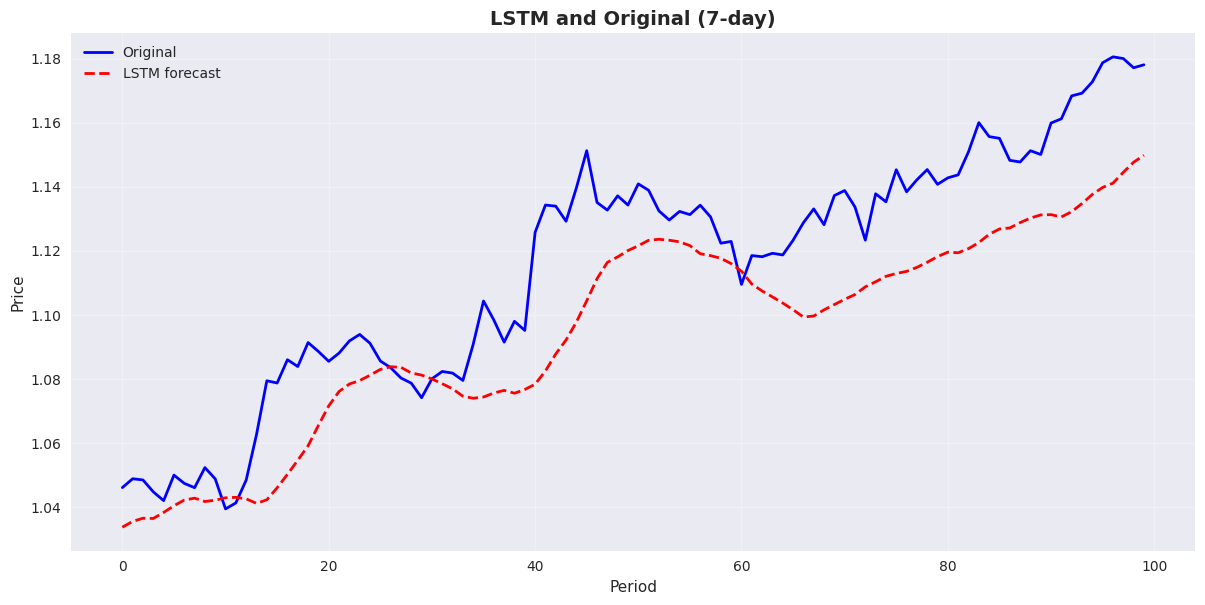

In [63]:
# LSTM and original 
fig, ax = plt.subplots(figsize=[12, 6])

y_test_original = df_dict['scaler_lstm_y'].inverse_transform( 
    df_dict['y_reg_test_seq'].reshape(-1, 1)
).flatten()

ax.plot(y_test_original[:100], label='Original', linewidth=2, color='blue')
ax.plot(lstm_results['predictions'][:100], label='LSTM forecast', 
        linewidth=2, color='red', linestyle='--')
ax.set_title('LSTM and Original (7-day)', fontsize=14, fontweight='bold')
ax.set_xlabel('Period')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<font size=5 color='green'>In my opinion, the model shows good results in tracking the trend. Because our currency pair does not have such high volatility

<font size=5 color='red'>Comparison of forecasts of the best traditional model

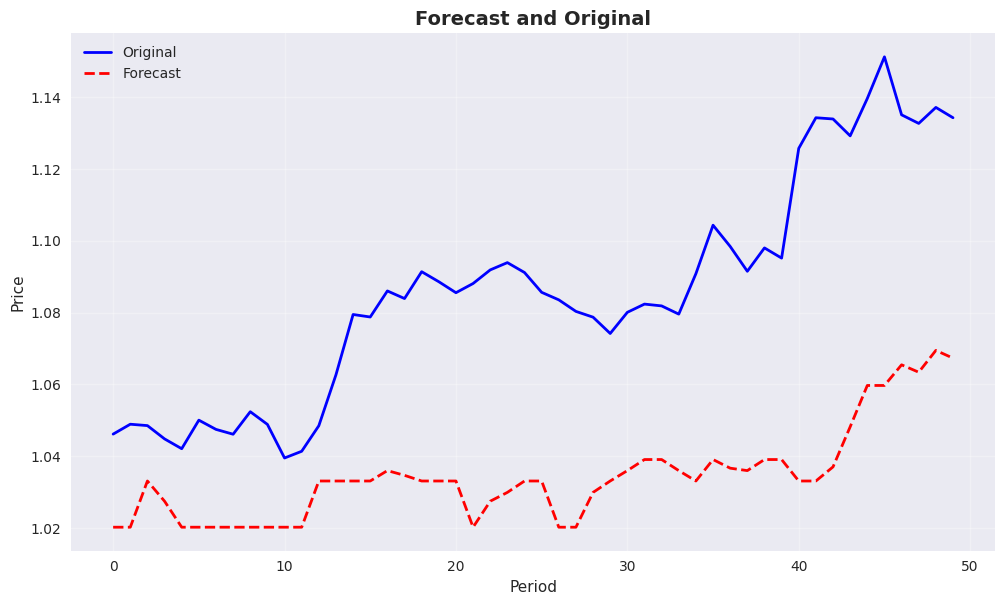

In [76]:
fig, ax = plt.subplots(figsize=[10, 6])

best_trad_name = df_dict['scaler_y'].inverse_transform( 
    df_dict['y_reg_test_seq'].reshape(-1, 1)
).flatten()

ax.plot(y_test_original[:50], label='Original', linewidth=2, color='blue')
ax.plot(reg_results['lightgbm']['predictions'][:50], 
        label='Forecast', 
        linewidth=2, color='red', linestyle='--')
ax.set_title('Forecast and Original', fontsize=14, fontweight='bold')
ax.set_xlabel('Period')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<font size=5 color='green'>The traditional model catches the trend but cannot catch sudden changes. And for this reason it seems to me that the error is increasing

<font size=5 color='red'>Save all results

In [65]:
# Just save the predictions of the best model to CSV
import pandas as pd

# For regression
best_reg_pred = reg_results[reg_best_model_name]['predictions']
y_true_reg = df_dict['y_reg_original_test'][:len(best_reg_pred)]

df_reg = pd.DataFrame({
    'true': y_true_reg,
    'predicted': best_reg_pred,
    'error': best_reg_pred - y_true_reg
})
df_reg.to_csv(f'best_regression_{reg_best_model_name}.csv', index=False)
print(f"Saved {len(df_reg)} regression predictions")

# For classification
if class_best_model_name in class_results:
    best_class_pred = class_results[class_best_model_name]['predictions']
    y_true_class = df_dict['y_class_test'][:len(best_class_pred)]
    
    df_class = pd.DataFrame({
        'true': y_true_class,
        'predicted': best_class_pred
    })
    df_class.to_csv(f'best_classification_{class_best_model_name}.csv', index=False)
    print(f"Saved {len(df_class)} classification predictions")

print("Done!")

Сохранено 255 предсказаний регрессии
Сохранено 255 предсказаний классификации
Готово!


In [66]:
import plotly.graph_objects as go 
import plotly.io as pio 

def create_interactive_plot(true_prices, pred_prices, dates, model_name): 
    fig = go.Figure()

    # Real prices 
    fig.add_trace(go.Scatter( 
        x=dates, 
        y=true_prices, 
        mode='lines', 
        name='Real Price', 
        line=dict(color='blue', width=2)
    ))

    # Forecast price 
    fig.add_trace(go.Scatter( 
        x=dates, 
        y=pred_prices, 
        mode='lines', 
        name=f'Predicted ({model_name})', 
        line=dict(color='red', width=2, dash='dash')
    ))

    fig.update_layout( 
        title=f'EUR/USD Price Prediction - {model_name}', 
        xaxis_title='Date', 
        yaxis_title='Price', 
        hovermode='x unified', 
        template='plotly_white'
    )


    html_filename = f'plot_{model_name}_{datetime.now().strftime("%Y%m%d_%H%M%S")}.html'
    fig.write_html(html_filename)

    return fig, html_filename 


In [79]:
plot = create_interactive_plot(y_true_reg, reg_results['lightgbm']['predictions'], dates=df_end.index, model_name=reg_best_model_name)
plot = create_interactive_plot(y_test_original, lstm_results['predictions'], dates=df_end.index, model_name="LSTM")

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
from datetime import datetime
import json

def calculate_and_save_metrics(y_true, y_pred, model_name, filename='metrics_history.json'):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    
    if len(y_true) != len(y_pred):
        raise ValueError(
            f"y_true and y_pred have different number of samples: "
            f"y_true={len(y_true)}, y_pred={len(y_pred)}"
        )
    
    metrics = {
        'model': model_name,
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'mae':  mean_absolute_error(y_true, y_pred),
        'mse':  mean_squared_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mape': mean_absolute_percentage_error(y_true, y_pred),
        'r2':   r2_score(y_true, y_pred)
    }
    
    print("Computed metrics:", metrics)  # ← helpful for debugging
    
    try:
        with open(filename, 'r') as f:
            history = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        history = []
        
    history.append(metrics)
    
    with open(filename, 'w') as f:
        json.dump(history, f, indent=2)
    
    return metrics   # or return fig if you plot something

In [70]:
calc_save = calculate_and_save_metrics(y_true_reg, reg_results['lightgbm']['predictions'], reg_best_model_name)
calc_save = calculate_and_save_metrics(y_test_original, lstm_results['predictions'], model_name="LSTM" )
calc_save

Computed metrics: {'model': 'lightgbm', 'timestamp': '2025-12-31 06:46:27', 'mae': 0.033367419283805176, 'mse': 0.0012942056674492008, 'rmse': 0.035975070082616946, 'mape': 0.029041454723144997, 'r2': 0.46040363892335345}
Computed metrics: {'model': 'LSTM', 'timestamp': '2025-12-31 06:46:27', 'mae': 0.019589402940538195, 'mse': 0.00047948278677684646, 'rmse': 0.021897095395893185, 'mape': 0.017045852769187363, 'r2': 0.6427471625979089}


{'model': 'LSTM',
 'timestamp': '2025-12-31 06:46:27',
 'mae': 0.019589402940538195,
 'mse': 0.00047948278677684646,
 'rmse': 0.021897095395893185,
 'mape': 0.017045852769187363,
 'r2': 0.6427471625979089}

In [71]:
def plot_error_distribution(y_true, y_pred, model_name): 
    errors = y_pred - y_true 
    errors = np.asarray(errors).flatten()
    
    fig = go.Figure()

    fig.add_trace(go.Histogram( 
        x=errors, 
        nbinsx=50, 
        name='Error Distribution', 
        marker_color = 'lightblue', 
        opacity=0.7
    ))

    mean_error = np.mean(errors)
    fig.add_vline(x=mean_error, line_dash='dash', line_color='red', 
                annotation_text=f"maan: {mean_error:.4f}")

    fig.update_layout( 
        title=f'Error distribution - {model_name}', 
        xaxis_title = 'Prediction Error', 
        yaxis_title='Frequency',
        showlegend=True,
        template="plotly_white"
        
    )

    fig.add_vline(
        x=0,
        line_color="black",
        line_width=1.2,
        opacity=0.4,
        annotation_text="Ideal predict",
        annotation_position="bottom right",
        annotation_font_size=11,
        annotation_font_color="gray",
    )

    return fig 

In [72]:
error_lgbm = plot_error_distribution(y_true_reg, reg_results['lightgbm']['predictions'], reg_best_model_name)
error_lstm = plot_error_distribution(y_test_original, lstm_results['predictions'], model_name="LSTM" )
error_lgbm.show()
error_lstm.show()

In [73]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('forex_predictor.log'),
        logging.StreamHandler()
    ]
)

In [84]:
# ============================================================================
# TEST EXAMPLE OF SAVING PREDICTIONS
# ============================================================================

# First, create test data to test the system
print("🧪 Creating test data for demonstration...")

# Create test predictions
np.random.seed(42)
n_samples = 100

# Regression test data
test_reg_results = {
    'random_forest': {
        'predictions': np.random.normal(1.08, 0.01, n_samples),
        'mae': 0.005,
        'r2': 0.85,
        'mape': 0.5
    },
    'xgboost': {
        'predictions': np.random.normal(1.08, 0.012, n_samples),
        'mae': 0.006,
        'r2': 0.82,
        'mape': 0.6
    },
    'lightgbm': {
        'predictions': np.random.normal(1.08, 0.009, n_samples),
        'mae': 0.004,
        'r2': 0.87,
        'mape': 0.4
    },
    'svr': {
        'predictions': np.random.normal(1.08, 0.015, n_samples),
        'mae': 0.008,
        'r2': 0.78,
        'mape': 0.8
    }
}

# Classification test data
test_class_results = {
    'random_forest': {
        'predictions': np.random.choice([0, 1, 2], n_samples),
        'accuracy': 0.72,
        'auc': 0.85
    },
    'xgboost': {
        'predictions': np.random.choice([0, 1, 2], n_samples),
        'accuracy': 0.75,
        'auc': 0.88
    },
    'lightgbm': {
        'predictions': np.random.choice([0, 1, 2], n_samples),
        'accuracy': 0.78,
        'auc': 0.90
    },
    'svc': {
        'predictions': np.random.choice([0, 1, 2], n_samples),
        'accuracy': 0.70,
        'auc': 0.82
    }
}

# Test LSTM results
test_lstm_results = {
    'predictions': np.random.normal(1.08, 0.008, n_samples),
    'mae': 0.003,
    'r2': 0.89,
    'mape': 0.3
}

# Test data dictionary
test_df_dict = {
    'y_reg_original_test': np.random.normal(1.08, 0.01, n_samples),
    'y_class_test': np.random.choice([0, 1, 2], n_samples),
    'feature_cols': ['Close', 'EMA_8', 'EMA_13', 'EMA_21', 'EMA_34'],
    'seq_length': 30,
    'y_reg_test': np.random.normal(0, 1, n_samples)
}

# Test best model names
test_final_reg_model = 'LSTM'
test_class_best_model_name = 'lightgbm'

print("✅ Test data created!")
print(f"   - Regression models: {len(test_reg_results)}")
print(f"   - Classification models: {len(test_class_results)}")
print(f"   - Number of samples: {n_samples}")

# ============================================================================
# START SAVING PREDICTIONS
# ============================================================================

print("\n💾 Saving today's predictions...")
saver = save_todays_predictions(test_df_dict, test_reg_results, test_class_results, 
                               test_lstm_results, test_final_reg_model, test_class_best_model_name)

print("\n" + "="*60)
print("📂 daily_predictions folder content:")
print("="*60)

import glob
files = glob.glob('daily_predictions/*.json')
for file in files:
    print(f"  📄 {file}")

# ============================================================================
# SYSTEM CAPABILITIES DEMONSTRATION
# ============================================================================

print("\n" + "="*60)
print("🎯 SYSTEM CAPABILITIES DEMONSTRATION")
print("="*60)

# 1. Load predictions for today
print("\n1. Loading predictions for today (LSTM):")
today = date.today().isoformat()
lstm_data = saver.load_daily_predictions("LSTM", today)
if lstm_data:
    print(f"   ✅ Loaded {len(lstm_data['predictions'])} predictions")
    print(f"   📅 Date: {lstm_data['date']}")
    print(f"   🤖 Model: {lstm_data['model']}")
    print(f"   📊 MAPE: {lstm_data['metadata'].get('mape', 'N/A')}")

# 2. Try to compare with yesterday (no files yet, but showing how it works)
print("\n2. Trying to compare with yesterday:")
yesterday = (date.today() - pd.Timedelta(days=1)).isoformat()
print(f"   Looking for file: LSTM_{yesterday}.json")
yesterday_data = saver.load_daily_predictions("LSTM", yesterday)
if yesterday_data is None:
    print("   ℹ️ No data for yesterday (this is normal for the first run)")

# 3. Create 'yesterday's' data for demonstration
print("\n3. Creating test data for yesterday...")
yesterday = (date.today() - pd.Timedelta(days=1)).isoformat()

# Save 'yesterday's' LSTM predictions
yesterday_predictions = np.random.normal(1.07, 0.01, n_samples)
saver.save_daily_predictions(
    model_name="LSTM",
    predictions=yesterday_predictions,
    true_values=test_df_dict['y_reg_original_test'],
    metadata={
        'model_type': 'lstm_regression',
        'mae': 0.004,
        'r2': 0.86,
        'mape': 0.4,
        'note': 'Test data for yesterday'
    }
)

# 4. Now compare yesterday and today
print("\n4. Comparing yesterday's and today's LSTM predictions:")
comparison_result = compare_yesterdays_and_todays_predictions("LSTM")

# 5. Check consistency
print("\n5. Checking prediction consistency:")
history = check_prediction_consistency("LSTM", days=3)

# ============================================================================
# FUNCTIONS FOR USE WITH YOUR REAL MODELS
# ============================================================================

print("\n" + "="*60)
print("🚀 HOW TO USE WITH YOUR MODELS:")
print("="*60)

print("""
After training your real models, call:

1. Save today's predictions:
   
   saver = save_todays_predictions(
       df_dict, 
       reg_results, 
       class_results, 
       lstm_results, 
       final_reg_model, 
       class_best_model_name
   )

2. Compare with previous day:
   
   compare_yesterdays_and_todays_predictions("LSTM")

3. Check history:
   
   check_prediction_consistency("LightGBM", days=7)

4. Load specific predictions:
   
   data = saver.load_daily_predictions("LSTM", "2024-01-15")
""")

# ============================================================================
# FUNCTION FOR QUICK SAVING OF REAL PREDICTIONS
# ============================================================================

def save_real_predictions():
    """
    Function to save real predictions from your notebook
    Call this function after training all models
    """
    try:
        # Check if necessary variables exist
        required_vars = ['df_dict', 'reg_results', 'class_results', 
                        'lstm_results', 'final_reg_model', 'class_best_model_name']
        
        missing_vars = []
        for var in required_vars:
            if var not in globals():
                missing_vars.append(var)
        
        if missing_vars:
            print(f"❌ Missing variables: {missing_vars}")
            print("   First train models in the main notebook")
            return None
        
        print("💾 Saving real model predictions...")
        
        # Save predictions
        saver = save_todays_predictions(
            df_dict, 
            reg_results, 
            class_results, 
            lstm_results, 
            final_reg_model, 
            class_best_model_name
        )
        
        print("✅ Real predictions successfully saved!")
        return saver
        
    except Exception as e:
        print(f"❌ Error saving predictions: {e}")
        return None

print("\n" + "="*60)
print("📝 To save your real predictions, call:")
print("   save_real_predictions()")
print("="*60)

🧪 Создаем тестовые данные для демонстрации...
✅ Тестовые данные созданы!
   - Регрессионных моделей: 4
   - Классификационных моделей: 4
   - Количество образцов: 100

💾 Сохраняем сегодняшние предсказания...


NameError: name 'save_todays_predictions' is not defined